# Tarea de Arranque
### Grupo 3
### MINE 4102 202310


In [154]:
# importa librerías

## Beautiful Soup 4
import bs4 as bs
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

El primer paso, consiste en importar el archivo y transformarlo usando ```Beautiful Soup``` para leer el contenido del texto.
Dejamos formuladas las variables de entrada para poder automatizar.

In [128]:
# nombre del archivo
fname = 'reut2-021.sgm'

# genera el objeto 'Soup'
f = open(fname, 'r')
data = f.read()
soup = bs.BeautifulSoup(data, 'html.parser')

Cada archivo de reuters, contiene varios artículos, por lo que es conveniente separar los artículos para poder accederlos independientemente.
Dada la estructura del archivo, vamos a extraer el texto delimitado por tags ```<BODY>``` / ```</BODY>``` y ```<TITLE>``` / ```</TITLE>``` que hace referencia al texto del archivo

In [129]:
# Define función que captura texto de títulos y cuerpo de cada archivo 

def captura_textos(soup):
    
    '''--------------------------
    Recibe objeto soup para cada archivo de reuters.
    Genera lista de títulos y de cuerpos para cada artículo.
    Existen títulos sin cuerpo.
    '''
    
    lista_art, lista_titulos = list(), list()
    
    for art in soup.find_all('body'):
        lista_art.append(art.get_text())
    
    for art in soup.find_all('title'):
        lista_titulos.append(art.get_text())
    
    return lista_art, lista_titulos

In [130]:
# captura de textos
ls_cuerpos, ls_titulos = captura_textos(soup)


En este archivo en particular, encontramos un total de 460 artículos con cuerpo de texto.
Cada artículo puede ser llamado con el iterable de la lista.

In [131]:
print('# de títulos en el archivo:', len(ls_titulos))
print('# de artículos con cuerpo en el archivo:', len(ls_cuerpos))

# de títulos en el archivo: 575
# de artículos con cuerpo en el archivo: 460


Con las listas de texto generadas, procedemos a limpiar el texto.
En primer lugar, consideramos todos los ```string``` en letras minúsculas (ya que nos parece más interesante investigar la frecuencia de palablas sin discriminar entre mayúsculas y minúsculas).
En segundo lugar, capturamos un nuevo ```string``` sin signos de puntuación.

In [132]:
def adecuacion_texto(ls):
    '''--------------------------
    Recibe lista de distintos strings.
    '''
    nueva_lista = list()
    for texto in ls:
        minusculas = texto.lower()
        sin_puntuacion = re.sub(r'[^\w\s][^\\n]', '', minusculas)
        nueva_lista.append(sin_puntuacion)
    return nueva_lista


In [133]:
ls_cuerpos_limpia, ls_titulos_limpia = adecuacion_texto(ls_cuerpos), adecuacion_texto(ls_titulos)

#Muestra
print('# Muestra del resultado: ',ls_titulos_limpia[2])

# Muestra del resultado:  ccr video sayst received offer to negotiate a takeover by intercep investment corp



Encontrar el # de palabras en el archivo.

In [134]:
def num_palabras(ls):
    count = 0
    for texto in ls:
        for palabra in texto.split():
            count += 1
    return count

In [135]:
print(num_palabras(ls_cuerpos_limpia))

48772


In [136]:
print(num_palabras(ls_titulos_limpia))

4150


Finalmente, para encontrar el número de palabras total en el archivo, unimos ambas listas (titulos + cuerpo) para tener un conteo del número total de palabras.

In [137]:
texto_archivo = ls_titulos_limpia + ls_cuerpos_limpia
conteo_total = num_palabras(texto_archivo)
print('Encontramos un total de {0} palabras en el archivo {1}.'.format(conteo_total, fname))

Encontramos un total de 52922 palabras en el archivo reut2-021.sgm.


Generar contador de frecuencia de cada una de las palabras que aparecen en el texto.

In [213]:
def gen_df_frecuencias(ls):
    '''
    ------------------------
    Recibe lista agregada de texto y genera diccionario en formato {palabra: frecuencia}
    '''
    d = dict()
    for texto in ls:
        for word in texto.split():
            if word in d:
                d[word] += 1
            else:
                d[word] = 1
    flag_index = [i for i in range(len(d))]
    df = pd.DataFrame.from_dict(data = d, orient='index')
    df['Palabras'] = df.index.values
    df['indx'] = flag_index
    df['Freq'] = df[0]
    df.set_index(['indx'], inplace=True)
    df = df[['Palabras', 'Freq']]
    return df

In [214]:
df = gen_df_frecuencias(texto_archivo)

df.head()

,Palabras,Freq
indx,,
0,cityfed,2
1,financial,44
2,corp,173
3,says,30
4,it,354


In [215]:
df_s = df.sort_values(by='Freq', ascending=False)
df_s

,Palabras,Freq
indx,,
57,the,2394
56,of,1354
8,to,1236
150,in,982
263,vs,966
...,...,...
4557,cie,1
4556,und,1
4555,bbc,1


# Gráfica de Frecuencias

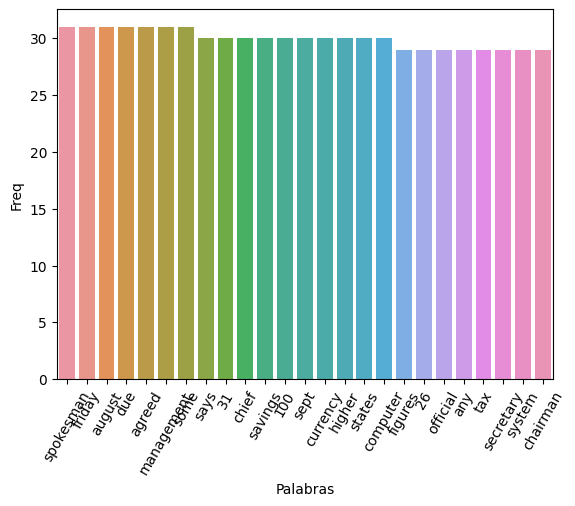

In [237]:
#Top n palabras
numero = 25
n0 = 200 #start
nn = n0 + numero #stop

# grafica
sns.barplot(data=df_s[n0:nn], x='Palabras', y='Freq')
x_ticks = [x for x in range(len(df_s[n0:nn]))]
ax = plt.subplot()
ax.set_xticks(x_ticks)
ax.set_xticklabels(df_s[n0:nn].Palabras, rotation = 60)


plt.show()
plt.close()

In [242]:
the_cont = df_s[df_s.Palabras == 'spokesman'].Freq.values
print(the_cont)

[31]
